# HOUSE PRICE USING REGRESSION
This code will have various sections such as -
1. Environment Setup
2. Data Analysis (EDA)
3. Feature Engineering
4. Preprocessing
5. Feature Selection
6. Model Design
7. Performance Evaluation

The data used here is House Prices - Advanced Regression Techniques from Kaggle which has more than 80 features and is used to predict the sale of a house.


# Lifecycle of a Data Science Project

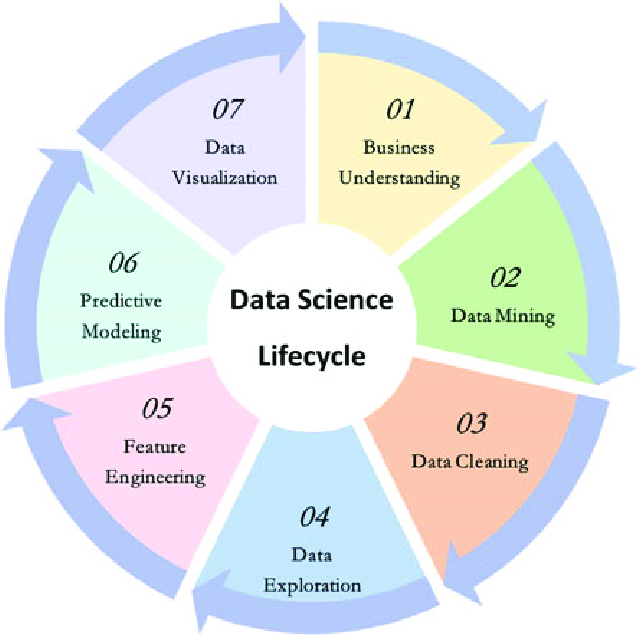

### Business Understanding

<i>Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.</i>

### Libraries for the project

In [ ]:
#Import all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm

#Libraries for Machine Learning
from sklearn import model_selection, preprocessing, feature_selection, ensemble, metrics, decomposition
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor,plot_importance
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn import preprocessing


### Data Mining

In [ ]:
# Load the data from the data file.
data_path = "/content/train.csv"
test_path = "/content/test.csv"
df = pd.read_csv(data_path)
test_df = pd.read_csv(test_path)

### Exploratory Data Analysis or Data Exploration

In [ ]:
print("Full train dataset shape is {}".format(df.shape))
print("Full test dataset shape is {}".format(test_df.shape))

Full train dataset shape is (1460, 81)
Full test dataset shape is (1459, 80)


In [ ]:
df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [ ]:
df.tail(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

* From the dataset we can conclude that the field ID does not provide relevant information which helps predict the price of the house. Hence, it can be removed from the dataset.

In [ ]:
df.drop(columns='Id',inplace=True)

* After running <i>.info</i> on the dataset we can observe that some columns contain null values. Let us look further into these and try to cleanse the columns containing null values.


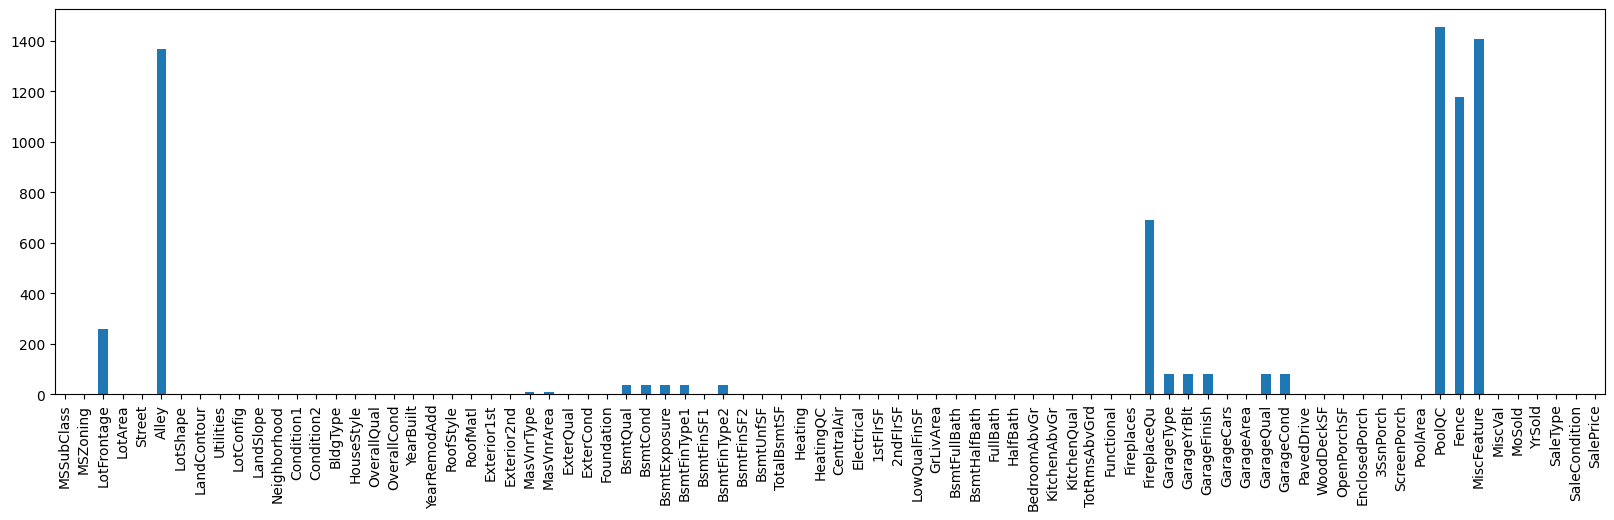

In [ ]:
plt.figure(figsize=(20,5))
df.isnull().sum().plot(kind='bar')
plt.show()

In [ ]:
null_frame = pd.DataFrame({'Total Null':df.isnull().sum(),'% of Null':df.isnull().sum()/df.shape[0]*100})
null_frame[null_frame["Total Null"]>0].sort_values(by = ["Total Null"],ascending=False)


,Total Null,% of Null
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945
GarageQual,81,5.547945


* From the above table we can understand that 19 columns contain null data.
* Column 'Pool QC' has the highest number of null values which is 1453 which means that 99.52% of the entire data present is null.
* And the column 'Electrical' has only one null value which is the least in the lot.

Now let us analyze and clean each column containing null values.
Starting with "Pool QC"

In [ ]:
temp_ds = df[["PoolQC","SalePrice"]]
temp_ds.PoolQC.fillna("NA",inplace=True)

<ipython-input-14-1491243b3eed>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_ds.PoolQC.fillna("NA",inplace=True)


[]

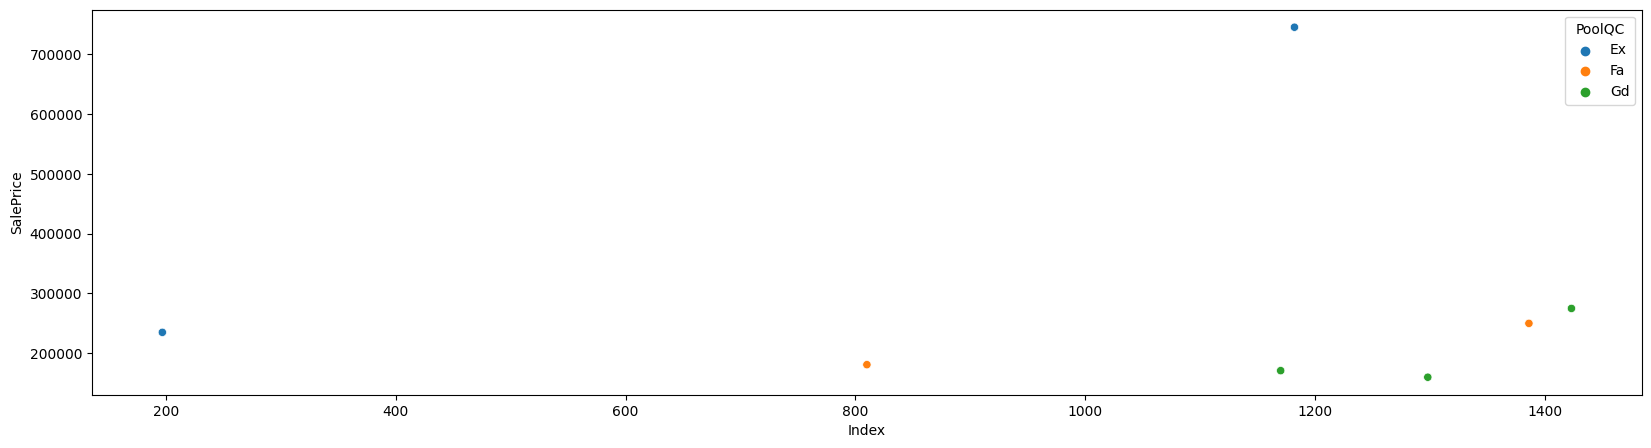

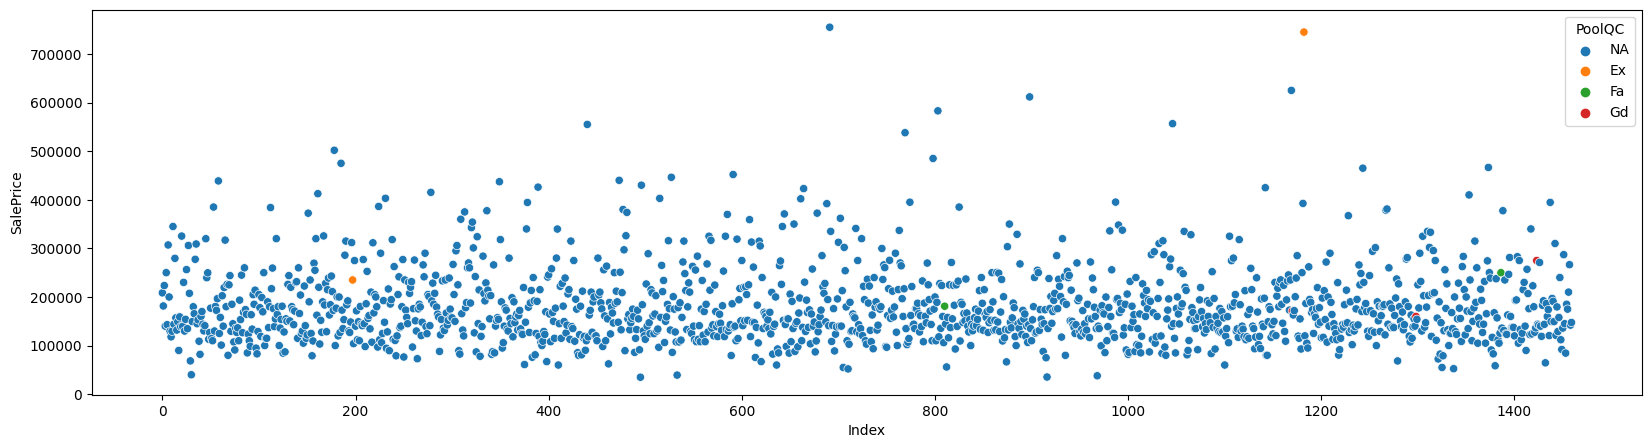

In [ ]:
plt.figure(figsize=(20,5))
sns.scatterplot(x=temp_ds.index,y=temp_ds.SalePrice,hue=temp_ds.PoolQC.where(temp_ds.PoolQC!="NA"))
plt.xlabel('Index')
plt.plot()
plt.figure(figsize=(20,5))
sns.scatterplot(x=temp_ds.index,y=temp_ds.SalePrice,hue=temp_ds.PoolQC)
plt.xlabel('Index')
plt.plot()

This feature has no impact in predicting the sales price since the variance in sale price for each category is high. So we can drop this column.

In [ ]:
df.drop(columns=["PoolQC"],inplace=True)

Next we analyse and clean the column "Alley".

In [ ]:
temp_ds = df[["Alley","Street","SalePrice"]]
temp_ds.Alley.fillna("NA",inplace=True)

<ipython-input-20-0fccdc2dffe9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_ds.Alley.fillna("NA",inplace=True)


In [ ]:
temp_ds.where(temp_ds.Alley=="NA").Street.value_counts()

Pave    1363
Grvl       6
Name: Street, dtype: int64

[]

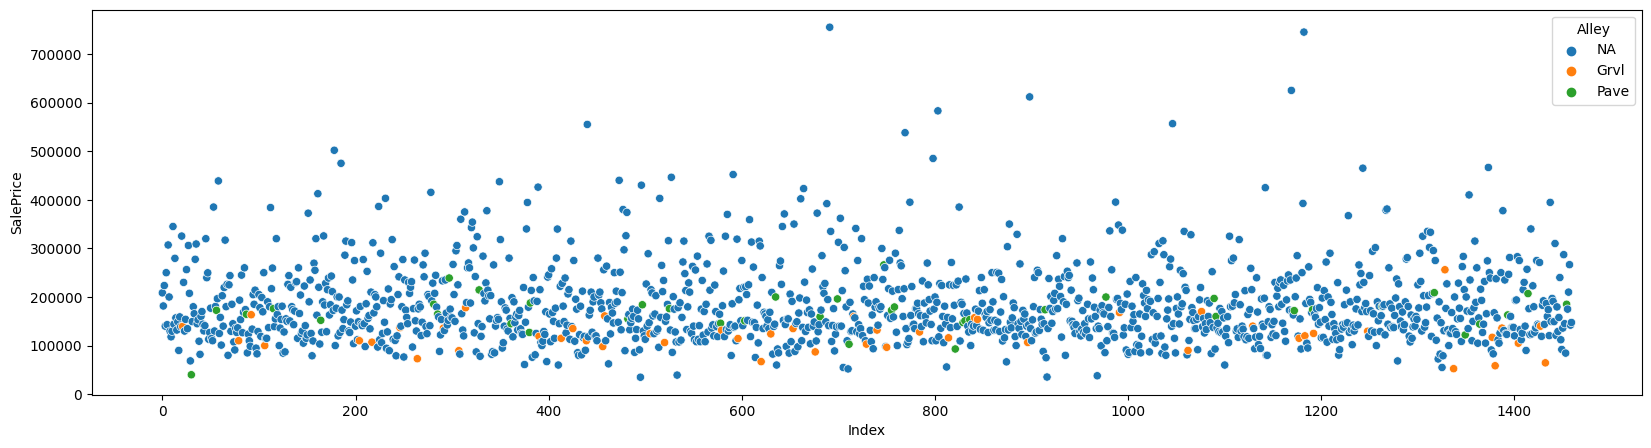

In [ ]:
plt.figure(figsize=(20,5))
sns.scatterplot(x=temp_ds.index,y=temp_ds.SalePrice,hue=temp_ds.Alley)
plt.xlabel('Index')
plt.plot()

[]

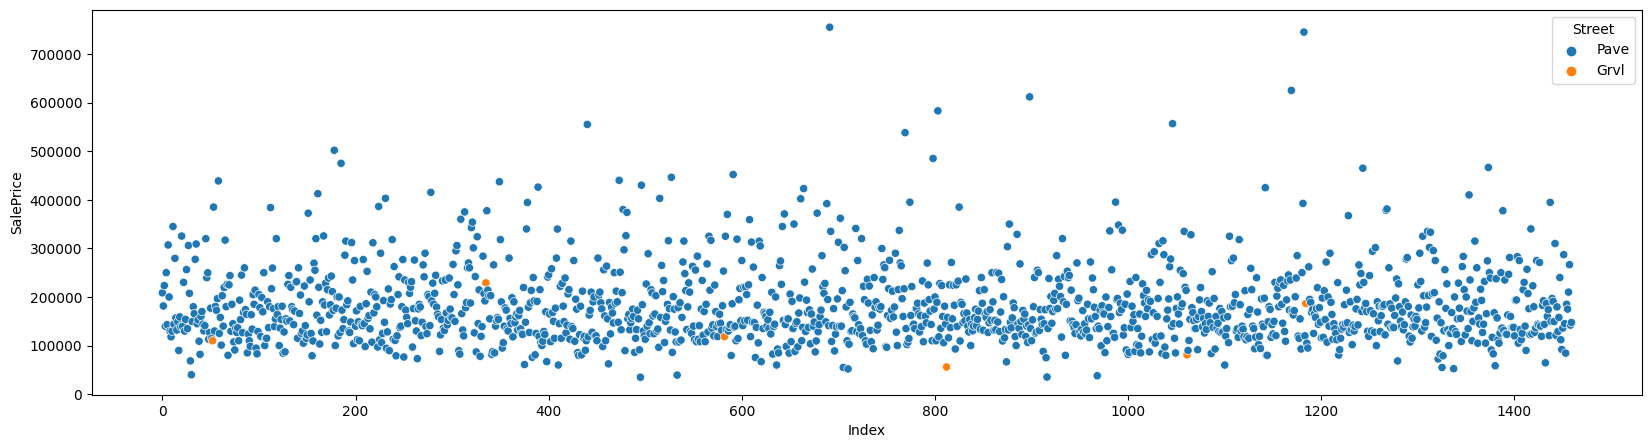

In [ ]:
plt.figure(figsize=(20,5))
sns.scatterplot(x=temp_ds.index,y=temp_ds.SalePrice,hue=temp_ds.Street)
plt.xlabel('Index')
plt.plot()

* From the above two graphs, we can understand that the columns Street and Alley are similar and show a positive co-relation with each other. Hence we can drop one column.
* Since, the column 'Alley' has three categories and distinguishes the price for gravel and Pave category in a pattern, in which they can help predict the Sale price we will keep the column 'Alley' over 'Street'.

In [ ]:
df.drop(columns=["Street"],inplace=True)
df.Alley.fillna("NA",inplace=True)

****************************************************************************

* Now we notice that the columns related to Garage have 81 missing values.
* In this dataset there are 7 columns related to Garage.
* So using these we can engineer the features which have a strong relation to Sales Price predictions.

In [ ]:
temp_ds = df[["GarageType","GarageYrBlt","GarageCars","GarageArea","GarageFinish","GarageQual","GarageCond","SalePrice"]]

In [ ]:
temp_ds[temp_ds.GarageType.isnull()]

,GarageType,GarageYrBlt,GarageCars,GarageArea,GarageFinish,GarageQual,GarageCond,SalePrice
39,NaN,NaN,0,0,NaN,NaN,NaN,82000
48,NaN,NaN,0,0,NaN,NaN,NaN,113000
78,NaN,NaN,0,0,NaN,NaN,NaN,136500
88,NaN,NaN,0,0,NaN,NaN,NaN,85000
89,NaN,NaN,0,0,NaN,NaN,NaN,123600
...,...,...,...,...,...,...,...,...
1349,NaN,NaN,0,0,NaN,NaN,NaN,122000
1407,NaN,NaN,0,0,NaN,NaN,NaN,112000
1449,NaN,NaN,0,0,NaN,NaN,NaN,92000
1450,NaN,NaN,0,0,NaN,NaN,NaN,136000


From the above table, we can conclude that all 81 null values are there for data points having no garages.

In [ ]:
temp_ds[temp_ds.GarageType.isnull()].describe()

,GarageYrBlt,GarageCars,GarageArea,SalePrice
count,0.0,81.0,81.0,81.000000
mean,NaN,0.0,0.0,103317.283951
std,NaN,0.0,0.0,32815.023389
min,NaN,0.0,0.0,34900.000000
25%,NaN,0.0,0.0,82500.000000
50%,NaN,0.0,0.0,100000.000000
75%,NaN,0.0,0.0,124000.000000
max,NaN,0.0,0.0,200500.000000


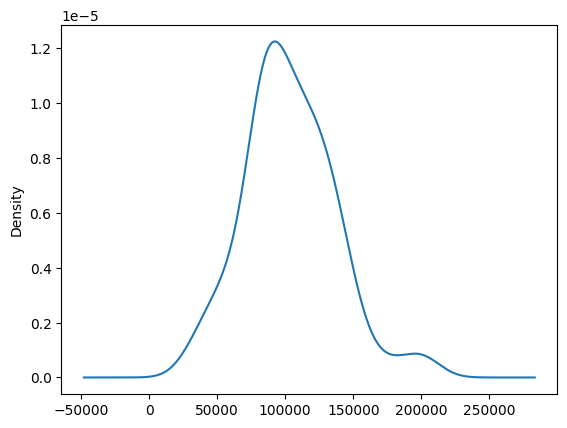

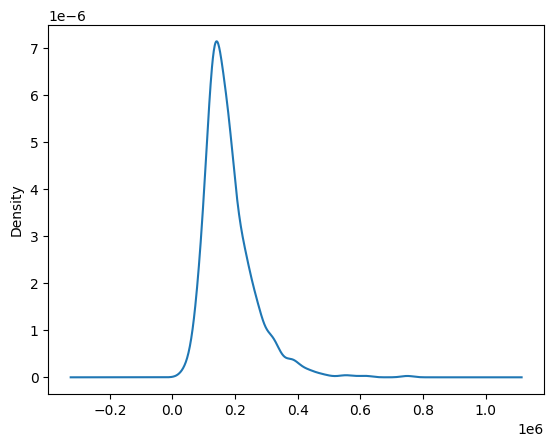

In [ ]:
temp_ds[temp_ds.GarageType.isnull()].SalePrice.plot(kind='kde')
plt.show()
df.SalePrice.plot(kind='kde')
plt.show()

From the above KDE plots we can understand that the population or mean price for datapoints having no garages lie between 50,000 to 1,50,000.

Hence, this can prove to be a strong feature. But we may need to reduce this to a more efficient feature for training.

An important point to note here is that we have redundant or similar columns which are highly co-related hence, we can drop one. Like:

* Garage condition and Garage Quality:
  * Both of them have the same categories and hence we are dropping Quality.
* Garage Cars and Garage areas:
  * Garage cars is categorical where as area is neumerical.

<Axes: xlabel='GarageArea', ylabel='SalePrice'>

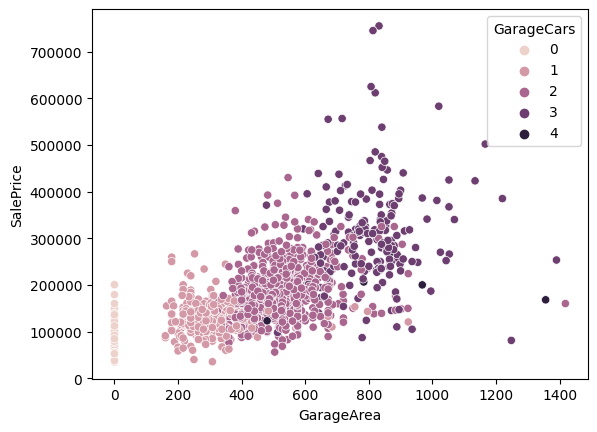

In [ ]:
sns.scatterplot(x=temp_ds.GarageArea,y=temp_ds.SalePrice,hue=temp_ds.GarageCars)

After analysing the graph, we can drop the categorical feature and proceed with the neumerical feature.

Garage Area, being a neumerical feature will give us a better approximation of the Sale Price when compared to Garage cars categorical column.

In [ ]:
temp_ds.drop(columns=["GarageCars","GarageQual"],inplace=True)

<ipython-input-30-2af0d1828054>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_ds.drop(columns=["GarageCars","GarageQual"],inplace=True)


In [ ]:
df.drop(columns=["GarageCars","GarageQual"],inplace=True)

In [ ]:
temp_ds.isnull().sum()

GarageType      81
GarageYrBlt     81
GarageArea       0
GarageFinish    81
GarageCond      81
SalePrice        0
dtype: int64

In [ ]:
df.GarageType.fillna("NA",inplace=True)
df.GarageFinish.fillna("NA",inplace=True)
df.GarageCond.fillna("NA",inplace=True)

Now that we have reduced the features related to garage.
Let us do the same for features related to basement.

In [ ]:
temp_ds = df[["BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinSF1","BsmtFinType2","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","SalePrice"]]

BsmtQuality takes lower precedence over basement Condition, so we can drop BsmtQuality. And the two columns have high similarity rates.

In [ ]:
temp_ds[temp_ds.BsmtExposure.isnull()]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,SalePrice
17,NaN,NaN,NaN,NaN,0,NaN,0,0,0,90000
39,NaN,NaN,NaN,NaN,0,NaN,0,0,0,82000
90,NaN,NaN,NaN,NaN,0,NaN,0,0,0,109900
102,NaN,NaN,NaN,NaN,0,NaN,0,0,0,118964
156,NaN,NaN,NaN,NaN,0,NaN,0,0,0,109500
182,NaN,NaN,NaN,NaN,0,NaN,0,0,0,120000
259,NaN,NaN,NaN,NaN,0,NaN,0,0,0,97000
342,NaN,NaN,NaN,NaN,0,NaN,0,0,0,87500
362,NaN,NaN,NaN,NaN,0,NaN,0,0,0,198500
371,NaN,NaN,NaN,NaN,0,NaN,0,0,0,134432


Removing data point on index 948 since it is unfinished and the only datapoint with those characteristics. This will not help the model learn.

In [ ]:
df.drop(index=[948],inplace=True)

In [ ]:
temp_ds.isnull().sum()

BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinSF1       0
BsmtFinType2    38
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
SalePrice        0
dtype: int64

Total BsmtSF is the sum of the columns BsmtFinSF1,BsmtFinSF2. So we can drop BsmtFinSF1,BsmtFinSF2.

In [ ]:
temp_ds.drop(columns=["BsmtFinSF1","BsmtFinSF2","BsmtQual"],inplace=True)

<ipython-input-38-f67207398e94>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_ds.drop(columns=["BsmtFinSF1","BsmtFinSF2","BsmtQual"],inplace=True)


In [ ]:
temp_ds.BsmtCond.fillna("NA",inplace=True)
temp_ds.BsmtFinType1.fillna("NA",inplace=True)
temp_ds.BsmtFinType2.fillna("NA",inplace=True)
temp_ds.BsmtExposure.fillna("NA",inplace=True)

<ipython-input-39-1f80389c2509>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_ds.BsmtCond.fillna("NA",inplace=True)
<ipython-input-39-1f80389c2509>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_ds.BsmtFinType1.fillna("NA",inplace=True)
<ipython-input-39-1f80389c2509>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_ds.BsmtFinType2.fillna("NA",inplace=True)
<ipython-input-39-1f80389c2509>:4: SettingWithCopyWarning: 

In [ ]:
df.drop(columns=["BsmtFinSF1","BsmtFinSF2","BsmtQual"],inplace=True)

df.BsmtCond.fillna("NA",inplace=True)
df.BsmtFinType1.fillna("NA",inplace=True)
df.BsmtFinType2.fillna("NA",inplace=True)
df.BsmtExposure.fillna("NA",inplace=True)

<ipython-input-43-a6a4556ecc18>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr().abs()


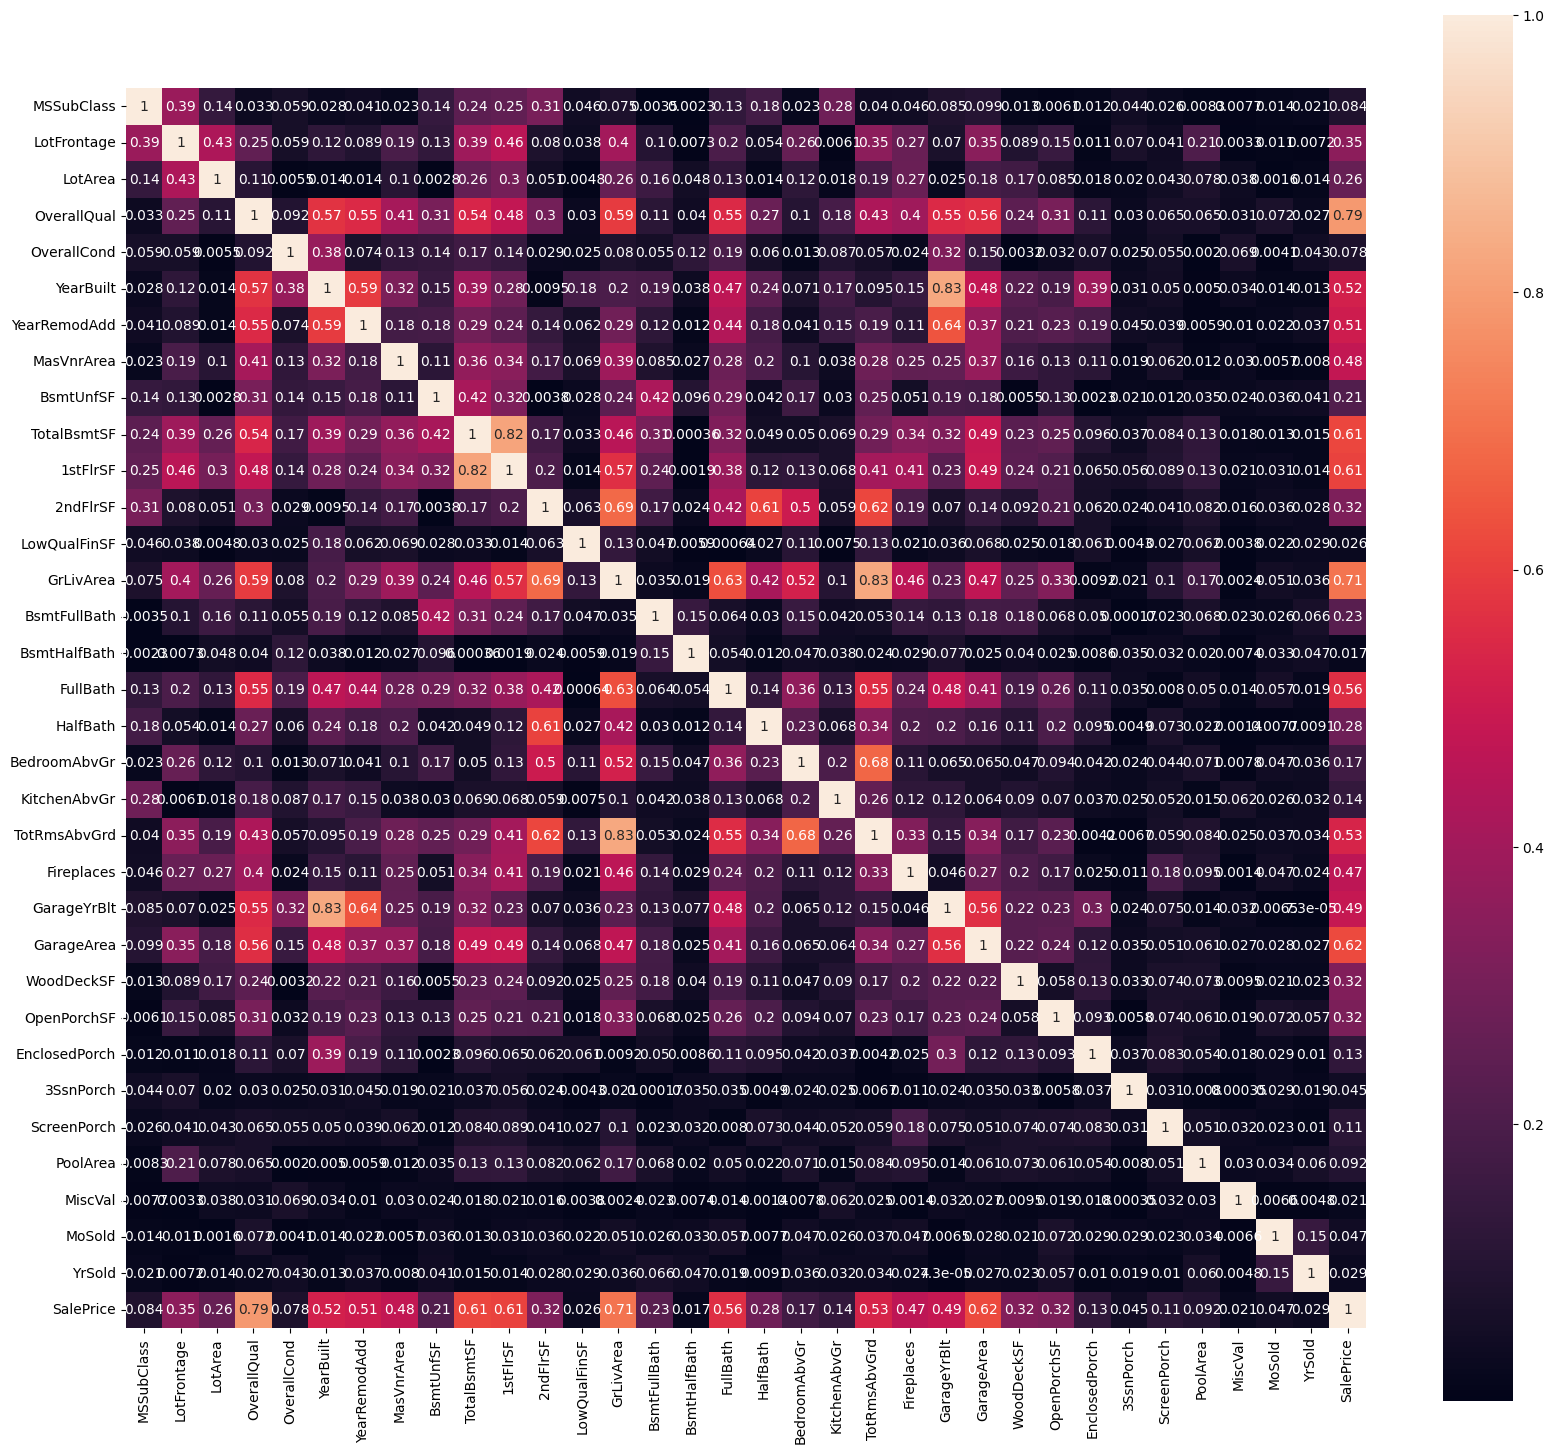

In [ ]:
corr = df.corr().abs()
f,ax = plt.subplots(figsize=(20,18))
sns.heatmap(corr,square =True,ax =ax,annot=True)
plt.show()

In [ ]:
Pred_corr = corr.nlargest(10,'SalePrice')
Pred_corr['SalePrice']

SalePrice       1.000000
OverallQual     0.791037
GrLivArea       0.708640
GarageArea      0.623436
TotalBsmtSF     0.613629
1stFlrSF        0.605987
FullBath        0.560709
TotRmsAbvGrd    0.533713
YearBuilt       0.522985
YearRemodAdd    0.507142
Name: SalePrice, dtype: float64

<ipython-input-45-0e318d0d0017>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr.where(np.tril(np.ones(corr.shape), k=0).astype(np.bool))


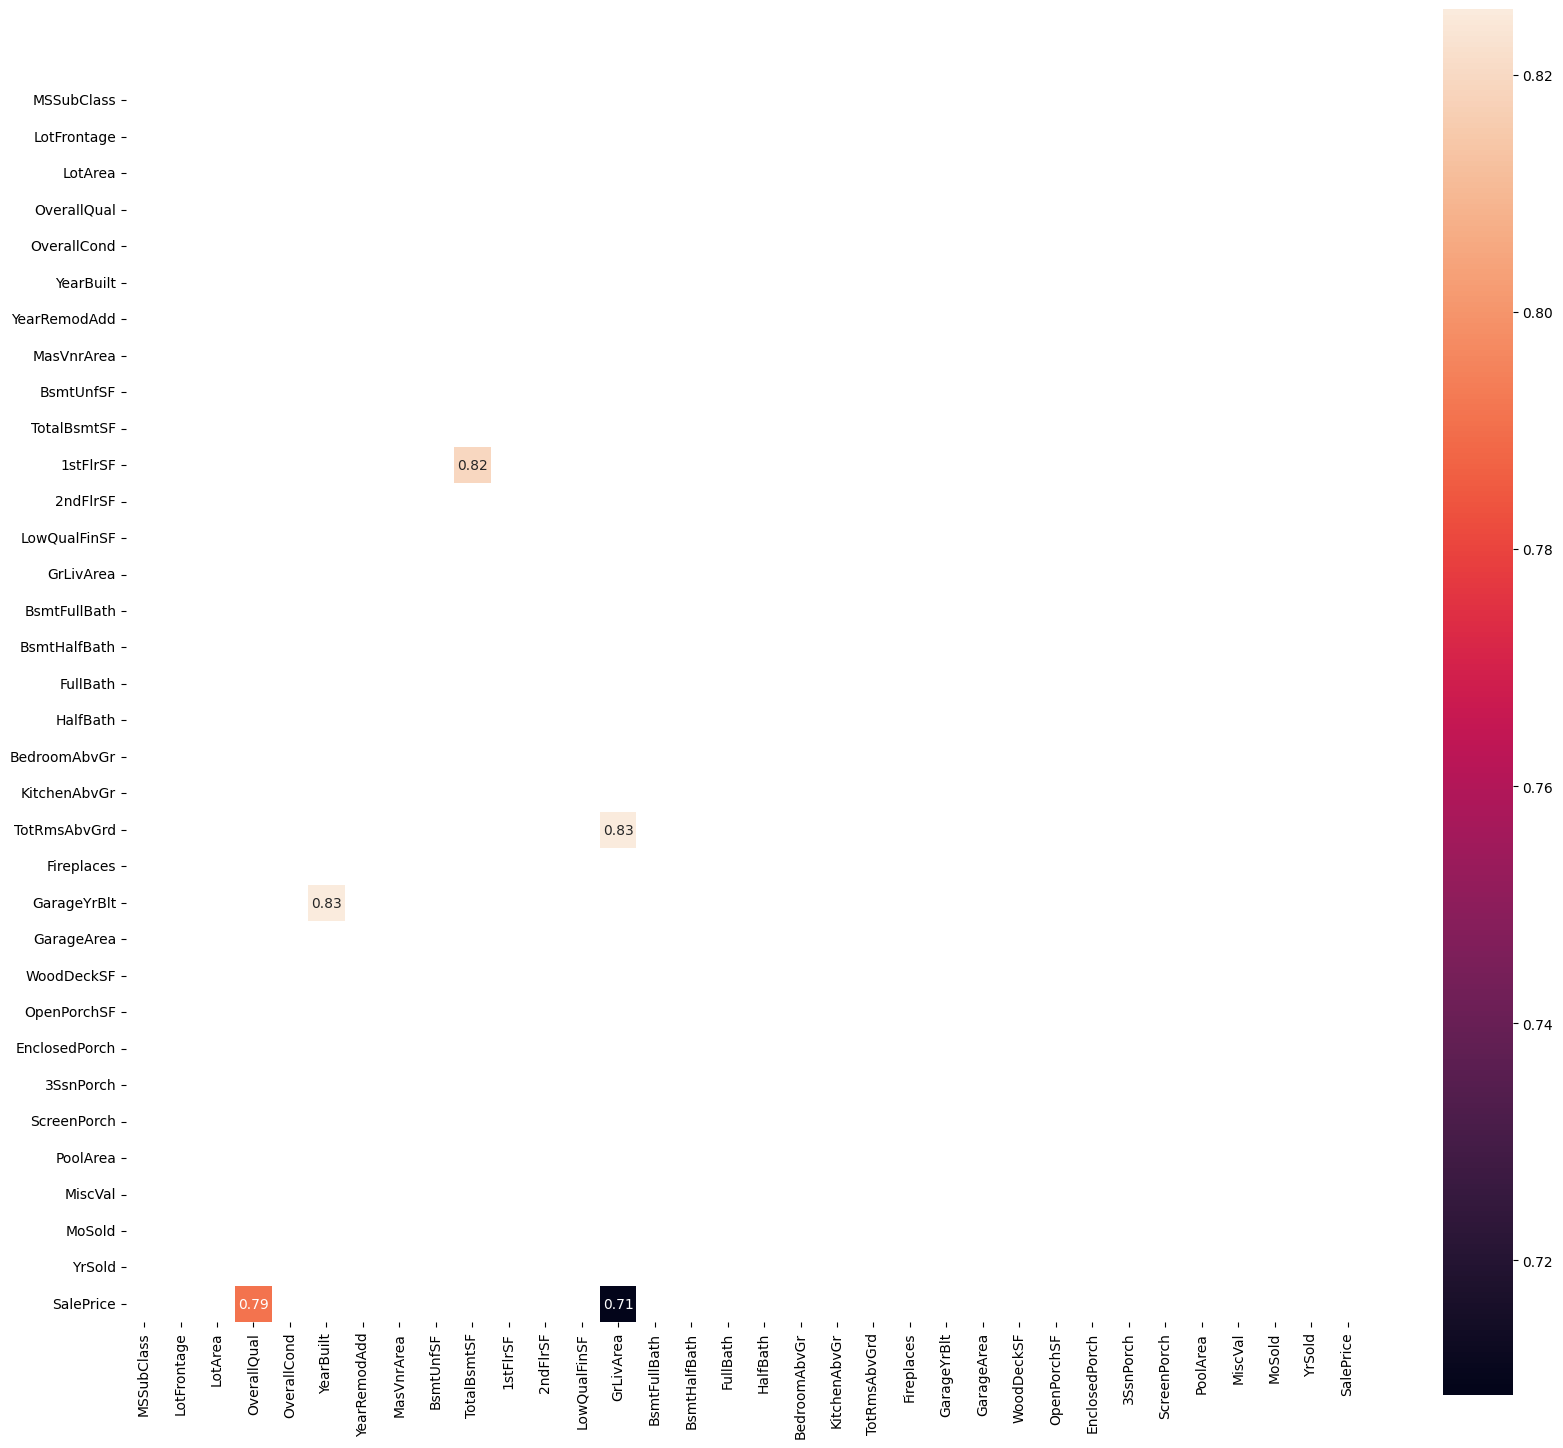

In [ ]:
upper = corr.where(np.tril(np.ones(corr.shape), k=0).astype(np.bool))
high_cor = upper[(upper>0.70)&(upper<1)]
f,ax = plt.subplots(figsize=(20,18))
sns.heatmap(high_cor,square=True,annot=True,ax=ax)
plt.show()

Since, year built and Garage built are highly corelated. We can drop Garage year built column.

In [ ]:
df.drop(columns=["GarageYrBlt"],inplace=True)

### Feature Engineering

We can derive a stronger feature using the following columns.

In [ ]:
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']

In [ ]:
df.drop(columns=['TotalBsmtSF','1stFlrSF','2ndFlrSF'],inplace=True)

So we have a single feature called as TotalSF which acts as a single strong neumerical feature which can help predict Sales Price.

### Dropping unwanted columns

In [ ]:
df.drop(columns=['Fence','MiscFeature','MoSold','Utilities', 'RoofMatl', 'MasVnrArea', 'MasVnrType', 'Heating', 'LowQualFinSF',
            'BsmtFullBath', 'BsmtHalfBath', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
            'Functional', 'GarageCond', 'GarageType', 'GarageFinish', 'WoodDeckSF',
            'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
            'MiscVal'],inplace=True)


In [ ]:
df.drop(columns=["LotFrontage"],inplace=True)



*   Dropping columns which are not significant for predicting sales price.



### Null Value Treatment for remaining columns.

In [ ]:
df.FireplaceQu.fillna("NA",inplace=True)

In [ ]:
df.Electrical.fillna("Mixed",inplace=True)

### EDA: Target Variable Analysis

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


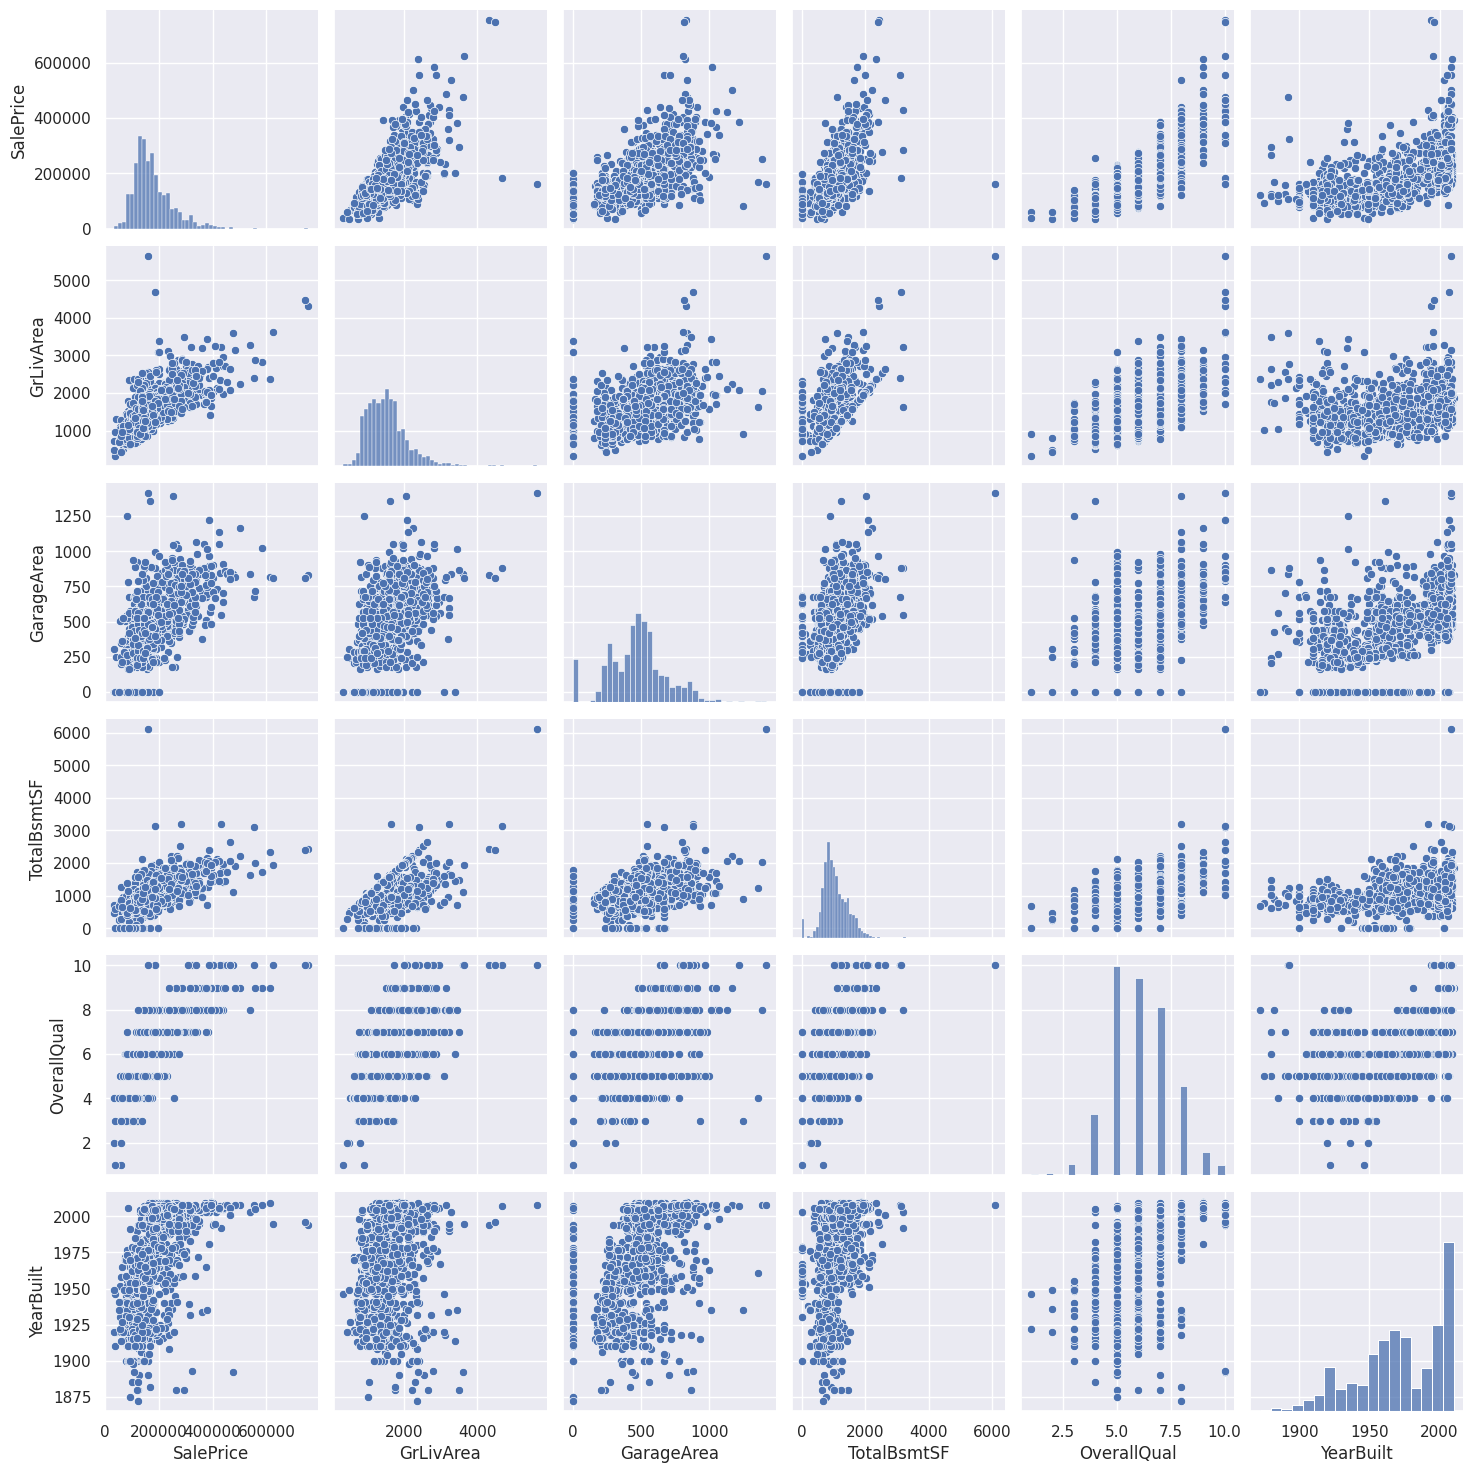

In [ ]:
sns.set()
cols = ['SalePrice',  'GrLivArea','GarageArea', 'TotalBsmtSF', 'OverallQual','YearBuilt']
sns.pairplot(df[cols], size = 2.5)
plt.show()

In [ ]:
# Basic summary:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<Axes: >

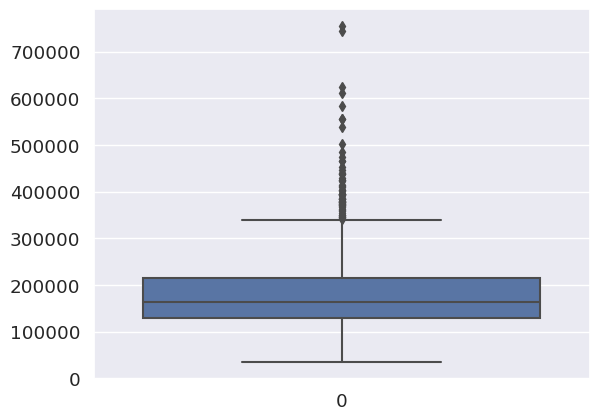

In [ ]:
sns.boxplot(df['SalePrice'])
#To know about the outliers and the unusual occurances in data

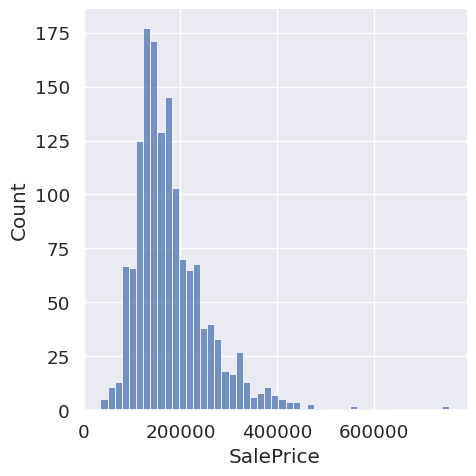

In [ ]:
sns.displot(df['SalePrice'])


From the graph we can see that it is right skewed distribution

In [ ]:
df["SalePrice"] = np.log1p(df["SalePrice"])
#calculates the natural logarithm of each value in the "SalePrice" column, then adds 1 to each result.

Text(0.5, 1.0, 'Density plot of SalePrice after Log Transformation')

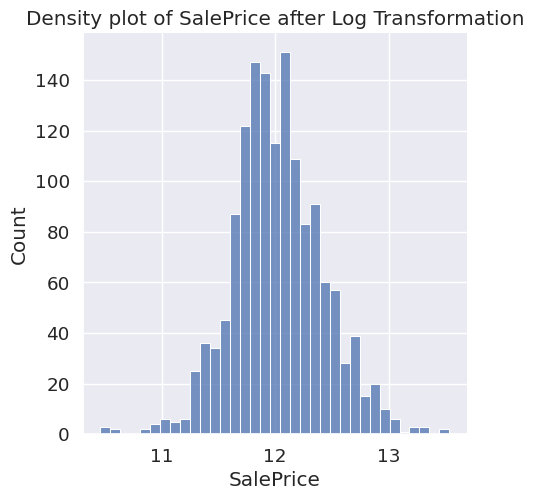

In [ ]:
# SalePrice after Log-transformation
sns.displot(df["SalePrice"])
plt.title("Density plot of SalePrice after Log Transformation")

### Sale Price vs Features Analysis

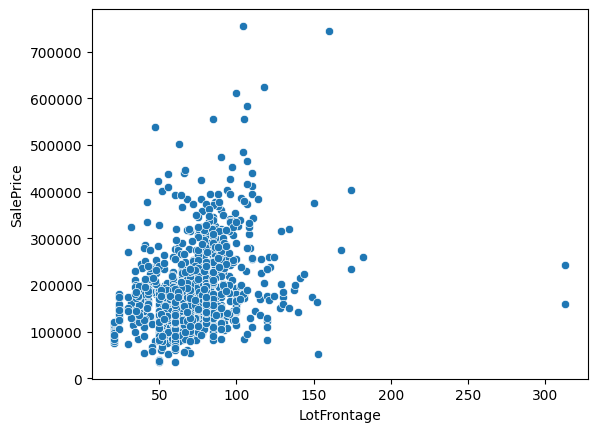

In [ ]:
sns.scatterplot(x='LotFrontage',y='SalePrice',data = df)
plt.show()

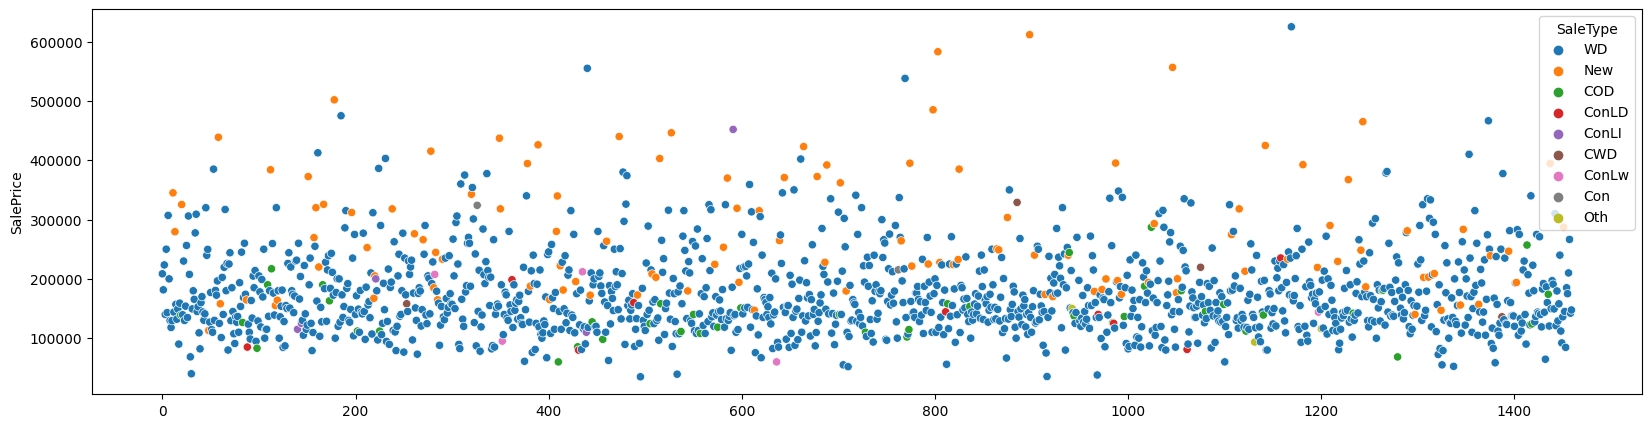

In [ ]:
temp_ds = df[["SaleType","SalePrice"]]
plt.figure(figsize=(20,5))
sns.scatterplot(x=temp_ds.index,y=temp_ds.SalePrice,hue=temp_ds.SaleType)
plt.show()

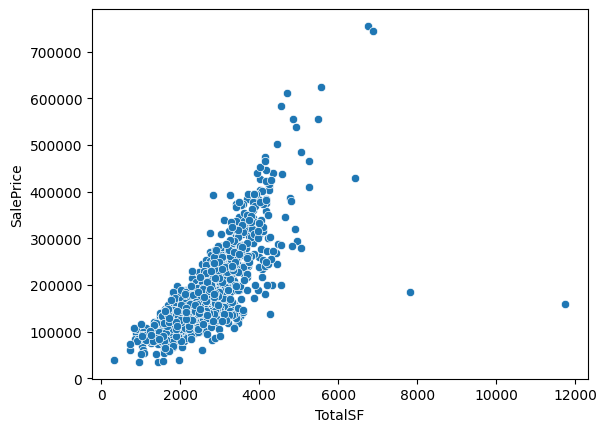

In [ ]:
sns.scatterplot(x='TotalSF',y='SalePrice',data = df)
plt.show()

Outlier Treatment
* From the graph we can detect certain extreme values whose prices fluctuate inspite of having higher square feet.
* Hence, we can remove those data points from the dataset.

In [ ]:
df = df[(df.TotalSF<6000)]

# Data preprocessing

### Treating categorical features

In [ ]:
cat_col = [x for x in df.columns if df[x].dtypes == 'object' ]
len(cat_col)

25

In [ ]:
label_encoder = preprocessing.LabelEncoder()
for col in cat_col:
    df[col]= label_encoder.fit_transform(df[col])

In [ ]:
X = df.drop(columns='SalePrice')
y = df.SalePrice

In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2, random_state = 0)

### Standardization

In [ ]:
scaler = preprocessing.StandardScaler()
scaler = scaler.fit(X_train)

X_train_transformed = scaler.transform(X_train)
X_test_transformed = scaler.transform(X_test)

### Modelling

In [ ]:
models = {
    'LinearRegression':LinearRegression(),
    'Lasso':Lasso(),
    'DecisionTreeRegressor':DecisionTreeRegressor(),
    'RandomForestRegressor':RandomForestRegressor(),
    'SVR':SVR()
}

In [ ]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train_transformed,y_train)

    ytrainpred = model.predict(X_train_transformed)
    ytestpred = model.predict(X_test_transformed)

    print("Model Name: {}".format(list(models.keys())[i]))
    print("Model performance for Training set")
    print("MEAN ABSOLUTE ERROR FOR TRAIN DATA:",mean_absolute_error(y_train, ytrainpred))
    print("MEAN SQUARED ERROR FOR TRAIN DATA:",mean_squared_error(y_train, ytrainpred))
    print("RMSE OF TRAIN DATA:",np.sqrt(mean_squared_error(y_train,ytrainpred)))
    print("R2 SCORE OF TRAIN DATA:",round(r2_score(ytrainpred,y_train)*100,2),'%')


    print("Model performance for Testing  set")
    print("MEAN ABSOLUTE ERROR FOR TRAIN DATA:",mean_absolute_error(y_test, ytestpred))
    print("MEAN SQUARED ERROR FOR TRAIN DATA:",mean_squared_error(y_test, ytestpred))
    print("RMSE OF TRAIN DATA:",np.sqrt(mean_squared_error(y_test,ytestpred)))
    print("R2 SCORE OF TRAIN DATA:",round(r2_score(y_test,ytestpred)*100,2),'%')

    print()
    print("----------------------------------------------------------")

Model Name: LinearRegression
Model performance for Training set
MEAN ABSOLUTE ERROR FOR TRAIN DATA: 18117.496700911946
MEAN SQUARED ERROR FOR TRAIN DATA: 679311589.7386514
RMSE OF TRAIN DATA: 26063.60661417854
R2 SCORE OF TRAIN DATA: 86.93 %
Model performance for Testing  set
MEAN ABSOLUTE ERROR FOR TRAIN DATA: 17444.526127888887
MEAN SQUARED ERROR FOR TRAIN DATA: 660386970.292689
RMSE OF TRAIN DATA: 25697.995452810886
R2 SCORE OF TRAIN DATA: 88.39 %

----------------------------------------------------------
Model Name: Lasso
Model performance for Training set
MEAN ABSOLUTE ERROR FOR TRAIN DATA: 18117.010816323665
MEAN SQUARED ERROR FOR TRAIN DATA: 679311643.9222502
RMSE OF TRAIN DATA: 26063.607653627885
R2 SCORE OF TRAIN DATA: 86.93 %
Model performance for Testing  set
MEAN ABSOLUTE ERROR FOR TRAIN DATA: 17444.02402427306
MEAN SQUARED ERROR FOR TRAIN DATA: 660355453.8445803
RMSE OF TRAIN DATA: 25697.382237196463
R2 SCORE OF TRAIN DATA: 88.4 %

----------------------------------------

### Advanced Regression with fine-tuning.

In [ ]:

rd=Ridge(alpha=0.3)
rd.fit(X_train_transformed,y_train)
ytrainpred = rd.predict(X_train_transformed)
ytestpred = rd.predict(X_test_transformed)
print("Ridge Regression Report:")
print("Model performance for Training set")
print("MEAN ABSOLUTE ERROR FOR TRAIN DATA:",mean_absolute_error(y_train, ytrainpred))
print("MEAN SQUARED ERROR FOR TRAIN DATA:",mean_squared_error(y_train, ytrainpred))
print("RMSE OF TRAIN DATA:",np.sqrt(mean_squared_error(y_train,ytrainpred)))
print("R2 SCORE OF TRAIN DATA:",round(r2_score(ytrainpred,y_train)*100,2),'%')


print("Model performance for Testing set")
print("MEAN ABSOLUTE ERROR FOR TEST DATA:",mean_absolute_error(y_test, ytestpred))
print("MEAN SQUARED ERROR FOR TEST DATA:",mean_squared_error(y_test, ytestpred))
print("RMSE OF TEST DATA:",np.sqrt(mean_squared_error(y_test,ytestpred)))
print("R2 SCORE OF TEST DATA:",round(r2_score(y_test,ytestpred)*100,2),'%')
print("\n********************************\n")

la=Lasso(alpha=5)
la.fit(X_train_transformed,y_train)
ytrainpred = la.predict(X_train_transformed)
ytestpred = la.predict(X_test_transformed)
print("Lasso Regression Report:")
print("Model performance for Training set")
print("MEAN ABSOLUTE ERROR FOR TRAIN DATA:",mean_absolute_error(y_train, ytrainpred))
print("MEAN SQUARED ERROR FOR TRAIN DATA:",mean_squared_error(y_train, ytrainpred))
print("RMSE OF TRAIN DATA:",np.sqrt(mean_squared_error(y_train,ytrainpred)))
print("R2 SCORE OF TRAIN DATA:",round(r2_score(ytrainpred,y_train)*100,2),'%')


print("Model performance for Testing  set")
print("MEAN ABSOLUTE ERROR FOR TEST DATA:",mean_absolute_error(y_test, ytestpred))
print("MEAN SQUARED ERROR FOR TEST DATA:",mean_squared_error(y_test, ytestpred))
print("RMSE OF TEST DATA:",np.sqrt(mean_squared_error(y_test,ytestpred)))
print("R2 SCORE OF TEST DATA:",round(r2_score(y_test,ytestpred)*100,2),'%')
print("\n********************************\n")



regr = ElasticNet(alpha = 0.1,random_state=1,max_iter=40000)
regr.fit(X_train_transformed,y_train)
ytrainpred = regr.predict(X_train_transformed)
ytestpred = regr.predict(X_test_transformed)
print("ElasticNet Report:")
print("Model performance for Training set")
print("MEAN ABSOLUTE ERROR FOR TRAIN DATA:",mean_absolute_error(y_train, ytrainpred))
print("MEAN SQUARED ERROR FOR TRAIN DATA:",mean_squared_error(y_train, ytrainpred))
print("RMSE OF TRAIN DATA:",np.sqrt(mean_squared_error(y_train,ytrainpred)))
print("R2 SCORE OF TRAIN DATA:",round(r2_score(ytrainpred,y_train)*100,2),'%')


print("Model performance for Testing  set")
print("MEAN ABSOLUTE ERROR FOR TEST DATA:",mean_absolute_error(y_test, ytestpred))
print("MEAN SQUARED ERROR FOR TEST DATA:",mean_squared_error(y_test, ytestpred))
print("RMSE OF TEST DATA:",np.sqrt(mean_squared_error(y_test,ytestpred)))
print("R2 SCORE OF TEST DATA:",round(r2_score(y_test,ytestpred)*100,2),'%')
print("\n********************************\n")

Ridge Regression Report:
Model performance for Training set
MEAN ABSOLUTE ERROR FOR TRAIN DATA: 18115.865377818503
MEAN SQUARED ERROR FOR TRAIN DATA: 679312054.690687
RMSE OF TRAIN DATA: 26063.615533741417
R2 SCORE OF TRAIN DATA: 86.93 %
Model performance for Testing  set
MEAN ABSOLUTE ERROR FOR TRAIN DATA: 17444.60837673618
MEAN SQUARED ERROR FOR TRAIN DATA: 660407786.9983423
RMSE OF TRAIN DATA: 25698.400475483726
R2 SCORE OF TRAIN DATA: 88.39 %

********************************

Lasso Regression Report:
Model performance for Training set
MEAN ABSOLUTE ERROR FOR TRAIN DATA: 18115.168340085154
MEAN SQUARED ERROR FOR TRAIN DATA: 679312943.8804635
RMSE OF TRAIN DATA: 26063.632591802383
R2 SCORE OF TRAIN DATA: 86.92 %
Model performance for Testing  set
MEAN ABSOLUTE ERROR FOR TRAIN DATA: 17442.011281547082
MEAN SQUARED ERROR FOR TRAIN DATA: 660230626.5507798
RMSE OF TRAIN DATA: 25694.953328441363
R2 SCORE OF TRAIN DATA: 88.4 %

********************************

ElasticNet Report:
Model pe

### Ensemble Techniques: GRADIENT BOOSTING REGRESSOR

In [ ]:
clf =GradientBoostingRegressor(alpha=0.1,n_estimators= 200, max_depth= 4, min_samples_split=2,learning_rate = 0.01, loss= 'absolute_error')

clf.fit(X_train_transformed, y_train)

GradientBoostingRegressor(alpha=0.1, learning_rate=0.01, loss='absolute_error',
                          max_depth=4, n_estimators=200)

In [ ]:
print("Gradient Boosted Score (TRAIN): ",clf.score(X_train_transformed,y_train))
print("Gradient Boosted Score (TRAIN): ",clf.score(X_test_transformed,y_test))

Gradient Boosted Score (TRAIN):  0.782382336284783
Gradient Boosted Score (TRAIN):  0.7530693701344509


In [ ]:
ytrainpred = clf.predict(X_train_transformed)
ytestpred = clf.predict(X_test_transformed)
print("Gradient Boosting Regressor Report:")

print("Model performance for Testing  set")
print("MEAN ABSOLUTE ERROR FOR TRAIN DATA:",mean_absolute_error(y_test, ytestpred))
print("MEAN SQUARED ERROR FOR TRAIN DATA:",mean_squared_error(y_test, ytestpred))
print("RMSE OF TRAIN DATA:",np.sqrt(mean_squared_error(y_test,ytestpred)))
print("R2 SCORE OF TRAIN DATA:",round(r2_score(y_test,ytestpred)*100,2),'%')
print("\n********************************\n")

Gradient Boosting Regressor Report:
Model performance for Testing  set
MEAN ABSOLUTE ERROR FOR TRAIN DATA: 21928.4413186944
MEAN SQUARED ERROR FOR TRAIN DATA: 1405139241.9857538
RMSE OF TRAIN DATA: 37485.18696746428
R2 SCORE OF TRAIN DATA: 75.31 %

********************************



# k-fold CV & XGBoost

In [ ]:

xgb_reg = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)


xgb_reg.fit(X_train_transformed, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, early_stopping_rounds=None,
             enable_categorical=False, eta=0.1, eval_metric=None,
             feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, predictor=None, ...)

In [ ]:
# Cross-Validation for 10 splits and 3 repeats
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(xgb_reg, X_train_transformed, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = np.absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

Mean MAE: 15771.055 (1534.621)


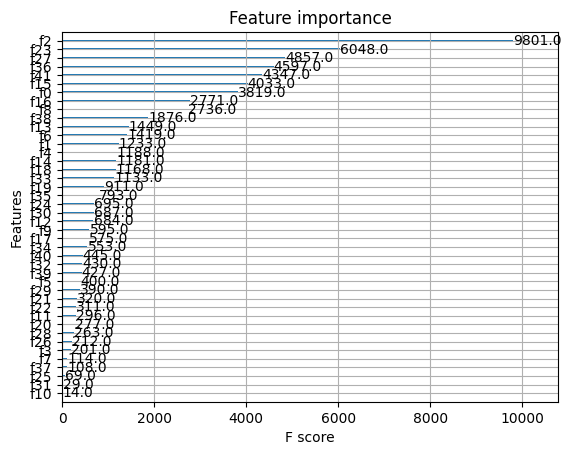

<Figure size 1600x1200 with 0 Axes>

In [ ]:
plot_importance(xgb_reg)
plt.figure(figsize = (16, 12))
plt.show()

# Results and Conclusions

* In this notebook we have performed an end to end data science project on the house price prediction dataset.

* We started by obtaining and loading the dataset using pandas library.
* Next, we used multiple visualization libraries like matplot and seaborn along with pandas in-built plot functions to perform exploratory data analysis of the dataset.
* After analyzing and understanding the data, we cleansed the data, ridding it from issues like null values and outliers.
* After obtaining the data which was relevant to help predict the target variable (SalePrice). We performed preprocessing. Following were the stages in pre-processing:
  1. Categorical Data Cleaning.
  2. Split dataset into test and train.
  3. Standardization of neumerical data.

* Now that we had obtained the training and testing data we performed modelling, in order to train the most accurate model which could predict the sale price for a house with minimal error.

* We used multiple models such as:
  1. Simple Linear regression
  2. Lasso
  3. Ridge
  4. Decision Tree
  5. Random Forest

* The models had shown promising performance. But we took a step further to better the results by employing ensemble techniques to boost the results.

* As the last stage of experimentation we ran XGBoost Regression algorithm on the housing dataset and reported the average MAE across the three repeats of 10-fold cross-validation.